In [1]:
import numpy as np
import center_algorithms as ca
import matplotlib.pyplot as plt
import time
import pandas

In [2]:

num_points = 20

n_its = 500

n_trials = 10

In [3]:
n = 10000
r = 10
ks = [i for i in range(1,21)]
mean_times = []
std_times = []
for j in range(20):
    k = ks[j]

    trial_times = []
    for seed in range(n_trials):
        np.random.seed(seed)
        center = np.random.rand(n,k)*10
        center_rep = np.linalg.qr(center)[0][:,:k]

        #generate dataset of points in Gr(k,n)
        data = []
        for i in range(num_points):
            Y_raw = center_rep + (np.random.rand(n,k)-.5)*.01
            Y = np.linalg.qr(Y_raw)[0][:,:k]
            data.append(Y)

        np.random.seed(1)
        Y_init = np.linalg.qr(np.random.rand(n,n))[0][:,:k]
        
        start = time.time()

        errors = ca.irls_flag(data, k, n_its, 'sine', opt_err = 'sine', fast = False, init = Y_init)[1]

        trial_times.append(time.time()- start)

    

    mean_times.append(np.mean(trial_times))
    std_times.append(np.std(trial_times))

    # iterations.append(len(errors))
    print(str(j)+' done.')

/home/katrina/a/mankovic/FlagIRLS/center_algorithms.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if init == 'random':
/home/katrina/a/mankovic/FlagIRLS/center_algorithms.py:304: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif init == 'data':


0 done.
1 done.
2 done.
3 done.
4 done.
5 done.
6 done.
7 done.
8 done.
9 done.
10 done.
11 done.
12 done.
13 done.
14 done.
15 done.
16 done.
17 done.
18 done.
19 done.


In [4]:

trial_stats = pandas.DataFrame(columns = ['k','Mean', 'Std'])
trial_stats['k'] = ks
trial_stats['Mean'] = mean_times
trial_stats['Std'] = std_times


In [4]:
times = pandas.read_csv('run_times_trial.csv')

([<matplotlib.axis.XTick at 0x7fad1ae8bee0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

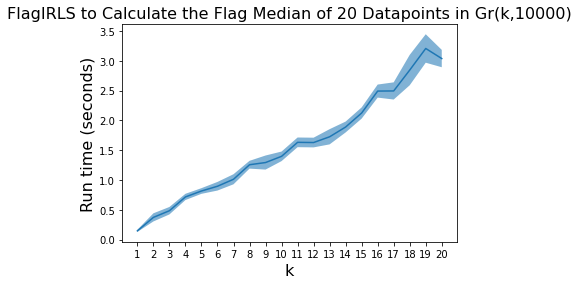

In [10]:
plt.plot(times['k'], times['Mean'])
plt.fill_between(times['k'], times['Mean']-times['Std'], times['Mean'] + times['Std'], alpha = .56)
plt.title('FlagIRLS for Flag Median of 20 data points in Gr(k,10000)', size = 16)
plt.xlabel('k', size = 16)
plt.ylabel('Run time (seconds)', size = 16)
plt.xticks(times['k'])

In [ ]:
import time

start = time.time()
np.linalg.svd(Y)
print(time.time()-start)

29.138014316558838
